## Loading Library

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [2]:
#1
data = pd.read_csv("https://raw.githubusercontent.com/WilbertBryan/dataset/refs/heads/main/bread%20basket.csv")
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [3]:
#2 info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
#3 check missing values
data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


4. The overview reveals a _________________________. (fill that blank on the section below)

there is no missing values

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-8-2b89695dfd1d>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date_time']).dt.date
<ipython-input-8-2b89695dfd1d>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['hour'] = pd.to_datetime(data['date_time']).dt.hour


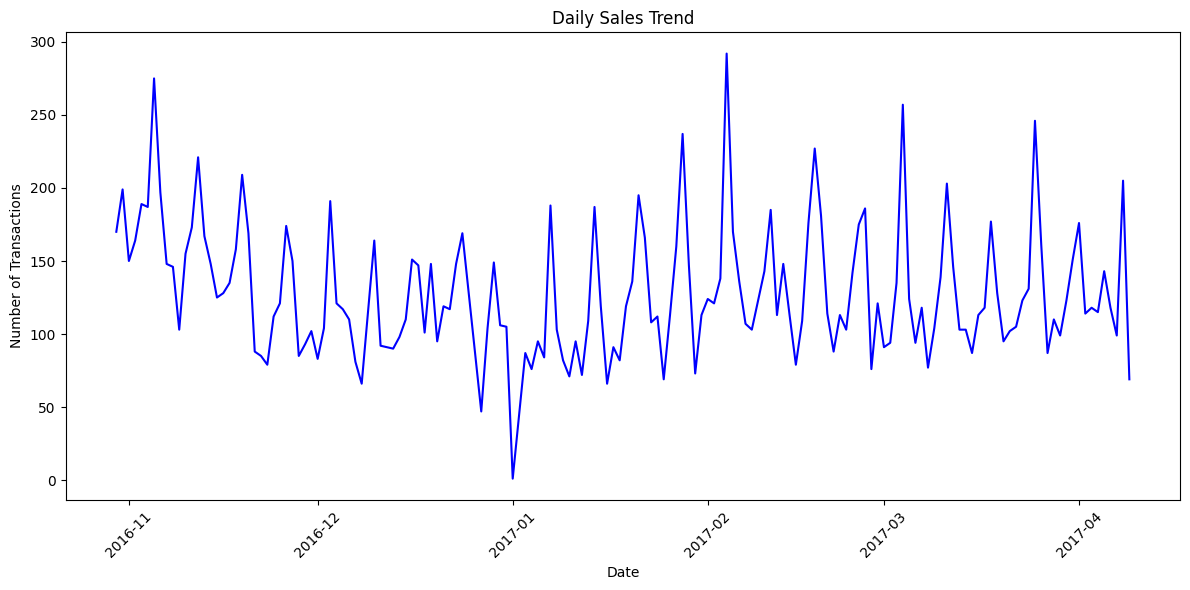

In [8]:
# 5
data['date'] = pd.to_datetime(data['date_time']).dt.date
data['hour'] = pd.to_datetime(data['date_time']).dt.hour


# Aggregate data: Count transactions per day
daily_sales = data.groupby('date').size()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, label='Transactions', linestyle='-', marker='', color='blue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Sales Trend')

# Format the x-axis for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [11]:
# 6
data['day'] = pd.to_datetime(data['date_time']).dt.day
data['month'] = pd.to_datetime(data['date_time']).dt.month
data['year'] = pd.to_datetime(data['date_time']).dt.year
data['time'] = pd.to_datetime(data['date_time']).dt.time
data['hour'] = pd.to_datetime(data['date_time']).dt.hour
data['day_name'] = pd.to_datetime(data['date_time']).dt.day_name()
data = data.drop(columns=['date'])
data.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-11-fd371e3965e5>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['day'] = pd.to_datetime(data['date_time']).dt.day
<ipython-input-11-fd371e3965e5>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['month'] = pd.to_datetime(data['date_time']).dt.month
<ipython-input-11-fd371e3965e5>:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) wa

,Transaction,Item,date_time,period_day,weekday_weekend,hour,day,month,year,time,day_name
18598,8819,Coffee,25-03-2017 16:11,afternoon,weekend,16,25,3,2017,16:11:00,Saturday
12858,6318,Soup,10-02-2017 12:11,afternoon,weekday,12,10,2,2017,12:11:00,Friday
19588,9261,Bread,02-04-2017 13:19,afternoon,weekend,13,2,4,2017,13:19:00,Sunday
2895,1395,Coffee,15-11-2016 14:40,afternoon,weekday,14,15,11,2016,14:40:00,Tuesday
7132,3598,Coffee,21-12-2016 11:54,morning,weekday,11,21,12,2016,11:54:00,Wednesday



Alright, now I can easily create a visualization of monthly sales.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-20-ea60243783ec>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date_time'])


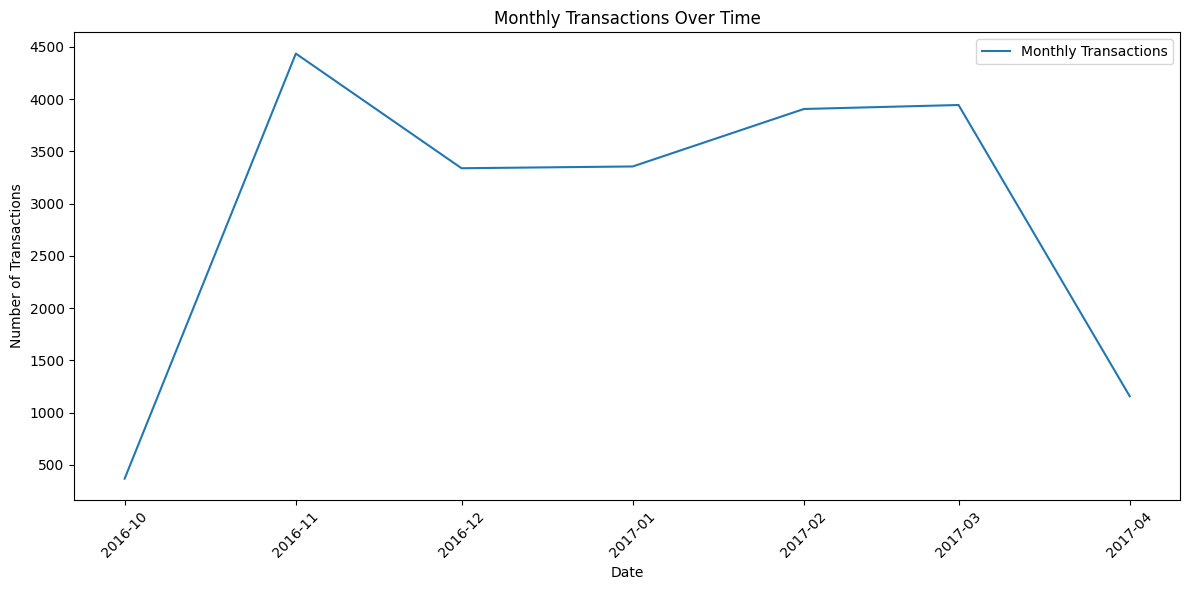

In [20]:
# 7
data['date'] = pd.to_datetime(data['date_time'])

monthly_transactions = data.groupby(['year', 'month']).size()

monthly_transactions = monthly_transactions.reset_index(name='Transaction Count')

monthly_transactions['date'] = pd.to_datetime(
    monthly_transactions[['year', 'month']].assign(Day=1)
)

plt.figure(figsize=(12, 6))
plt.plot(monthly_transactions['date'], monthly_transactions['Transaction Count'], label='Monthly Transactions')

plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Monthly Transactions Over Time')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

8. Now, the visualization above provides better insights: _________________________. (fill that blank on the section below)

october 2016 until november 2016 have the highest increase number of transaction but december 2016 until march 2017 the number of transaction is stagnant. march 2017 to april 2017 the number of transaction decreasing.

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [21]:
#9
weekday_names = data.loc[data['weekday_weekend'] == 'weekday', 'day_name'].unique()
weekend_names = data.loc[data['weekday_weekend'] == 'weekend', 'day_name'].unique()

print("Unique weekday names:", weekday_names)
print("Unique weekend names:", weekend_names)

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [24]:
#10
data['date_time'] = pd.to_datetime(data['date_time'])

data['month'] = data['date_time'].dt.month
data['day_name'] = data['date_time'].dt.day_name()

aggregation = data.pivot_table(
    index='month',
    columns='day_name',
    values='Transaction',
    aggfunc='count',
    fill_value=0
)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
aggregation = aggregation[day_order]

aggregation


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-24-b9edb11d6c58>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date_time'] = pd.to_datetime(data['date_time'])


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329,474,322,399,489,807,536
2,474,429,419,456,599,879,650
3,379,433,459,557,674,883,559
4,118,115,143,118,99,381,183
10,199,0,0,0,0,0,170
11,469,599,576,591,639,879,683
12,356,342,402,525,624,776,314


11. Wow, it turns out the insight that can be gained from the table above is _____

that weekends, especially Saturdays, consistently have the highest number of transactions across all months, while weekdays like Monday tend to have lower transaction counts. Additionally, December shows a significant increase in transactions due to holiday shopping, whereas April experiences a noticeable drop, indicating seasonal trends.


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


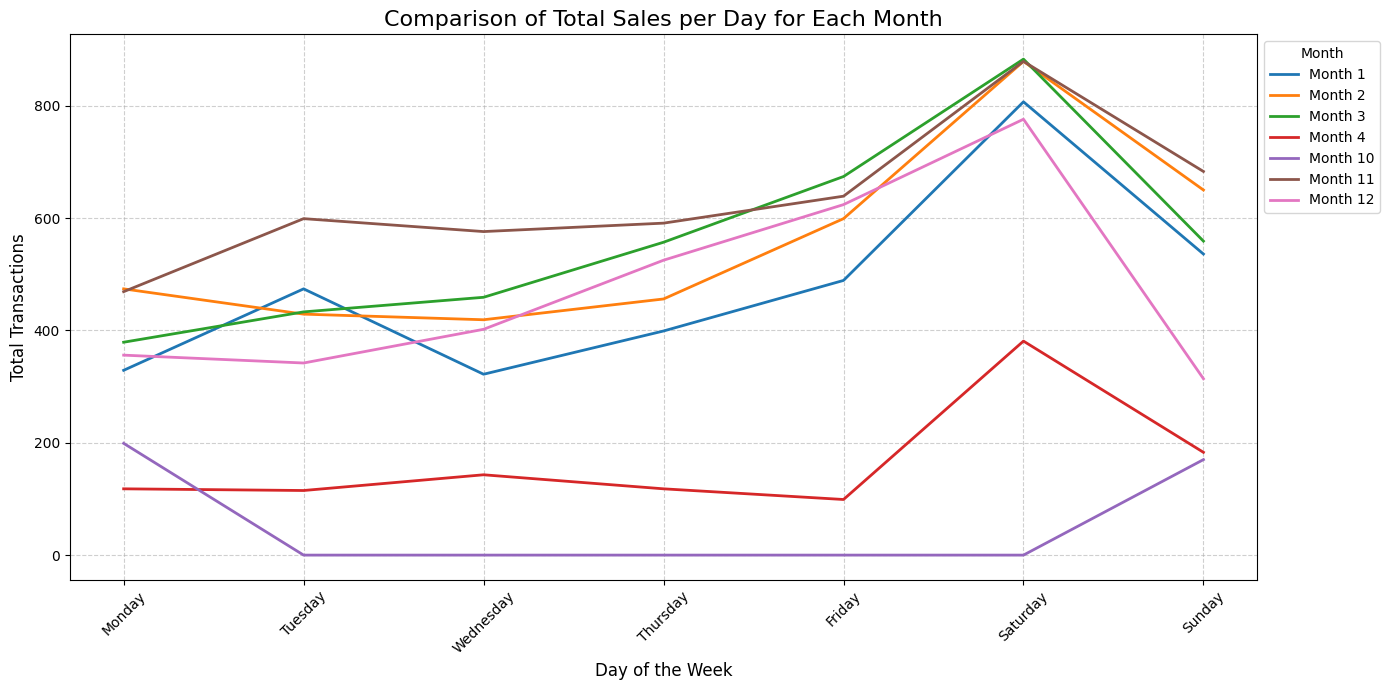

In [26]:
# 12

# Transpose the pivot table so that the days of the week are on the x-axis
pivot_table_t = aggregation.T

# Plot the line chart
plt.figure(figsize=(14, 7))

# Plot each month's data as a line, where the x-axis is the day of the week
for month in pivot_table_t.columns:
    plt.plot(pivot_table_t.index, pivot_table_t[month], label=f'Month {month}', linewidth=2, markersize=6)

# Add title and labels
plt.title('Comparison of Total Sales per Day for Each Month', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add a legend to show which line corresponds to which month
plt.legend(title='Month', loc='upper left', bbox_to_anchor=(1, 1))

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Adjust layout to fit everything
plt.tight_layout()

# Show the plot
plt.show()


13. Wow, after visualizing it like this, I can gain insights into the sales trends that ____.

Sales data reveals several key patterns throughout the months. Saturdays consistently show the highest sales, indicating increased customer activity during weekends. Additionally, Fridays often experience a rise in sales, particularly in months like February, March, and December, suggesting a trend of pre-weekend shopping. Weekdays, from Monday to Thursday, demonstrate relatively stable sales with only minor fluctuations, reflecting consistent customer engagement. However, certain months, such as April and October, experience a noticeable drop in sales, pointing to seasonal variations or possibly reduced business operations during these periods. Lastly, November and December stand out with higher sales, especially on weekends, likely driven by holiday shopping and seasonal promotions.

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [27]:
# 14
data['period_day'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [28]:
# 15
morning_hour = data.loc[data['period_day'] == 'morning', 'hour'].unique()
afternoon_hour = data.loc[data['period_day'] == 'afternoon', 'hour'].unique()
evening_hour = data.loc[data['period_day'] == 'evening', 'hour'].unique()
night_hour = data.loc[data['period_day'] == 'night', 'hour'].unique()

print("Unique morning_hour:", morning_hour)
print("Unique afternoon_hour:", afternoon_hour)
print("Unique evening_hour:", evening_hour)
print("Unique night_hour:", night_hour)

Unique morning_hour: [ 9 10 11  8  7  1]
Unique afternoon_hour: [12 13 14 15 16]
Unique evening_hour: [17 18 19 20]
Unique night_hour: [21 23 22]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

The oddity in the results is that the “morning_hour” array includes 1, which corresponds to 1:00 AM. This is unusual because the morning is generally understood to start around 6:00 AM or 7:00 AM and extends until 12:00 PM (noon). Including 1:00 AM in the “morning” category does not align with the conventional definition of morning, as it typically falls within the night or early morning hours. This could be due to a misclassification in the data, where 1:00 AM should have been categorized as part of the night or late night period instead. Alternatively, it could be a result of contextual differences in how morning hours are defined, but this is less common. To correct this, 1:00 AM should likely be removed from the morning hours and placed into the night or early morning period.


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


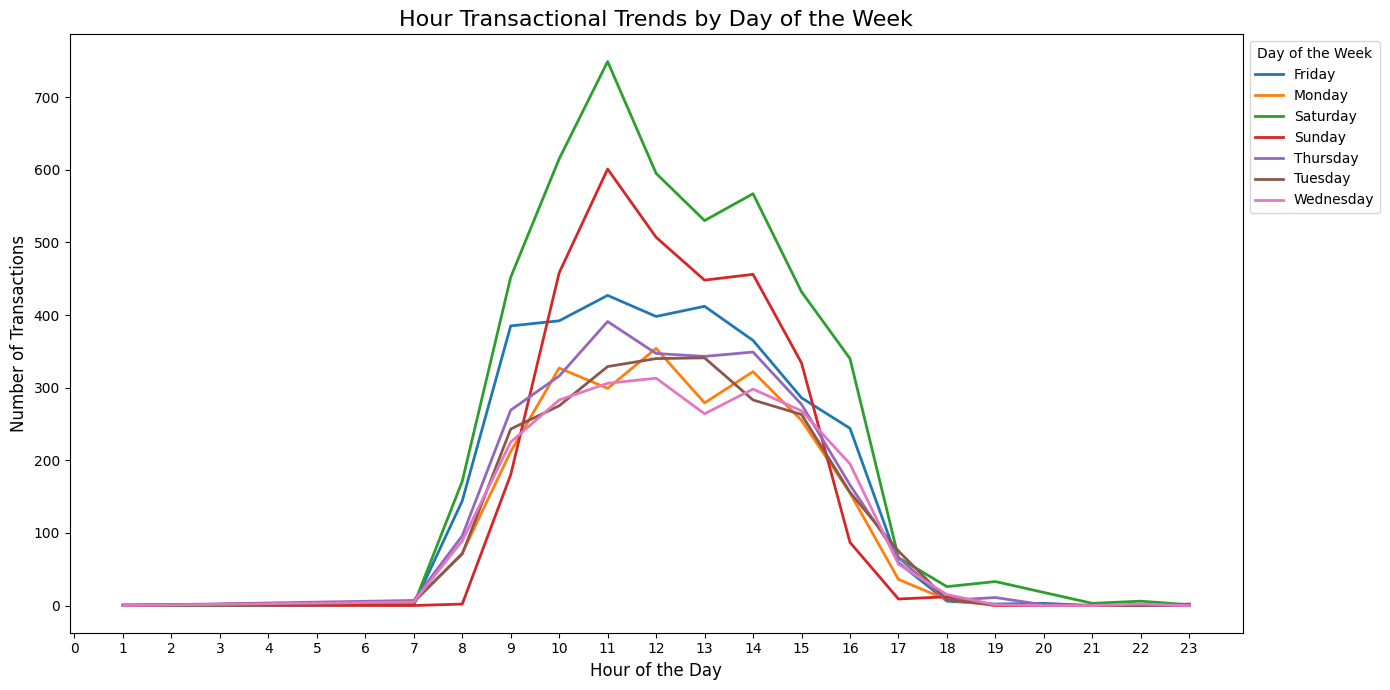

In [34]:
# 17

sales_by_hour = data.groupby(['hour', 'day_name']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 7))

for day in sales_by_hour.columns:
    plt.plot(sales_by_hour.index, sales_by_hour[day], label=day, linewidth=2, markersize=6)

plt.title('Hour Transactional Trends by Day of the Week', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(range(24))

plt.legend(title='Day of the Week', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


18. The daily sales trend plot reveals that _______

the number of transactions generally peaks during the late morning to early afternoon (around 10 AM to 2 PM), with Saturday experiencing the highest volume of transactions compared to other days. The trend gradually declines toward the evening across all days, with minimal activity during late-night and early-morning hours.

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


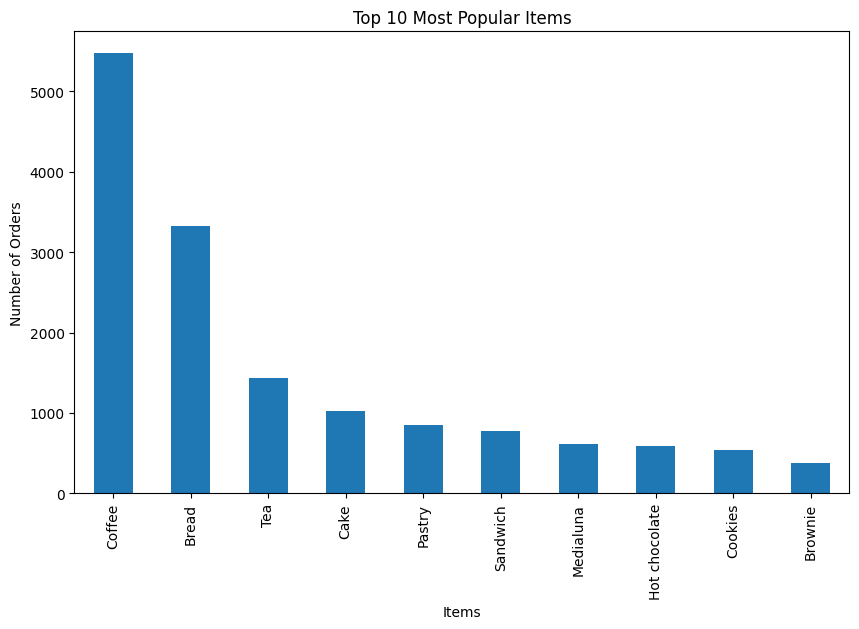

In [35]:
# 19
item_counts = data['Item'].value_counts().head(10)
plt.figure(figsize=(10, 6))
item_counts.plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Number of Orders')
plt.title('Top 10 Most Popular Items')
plt.xticks(rotation=90)
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


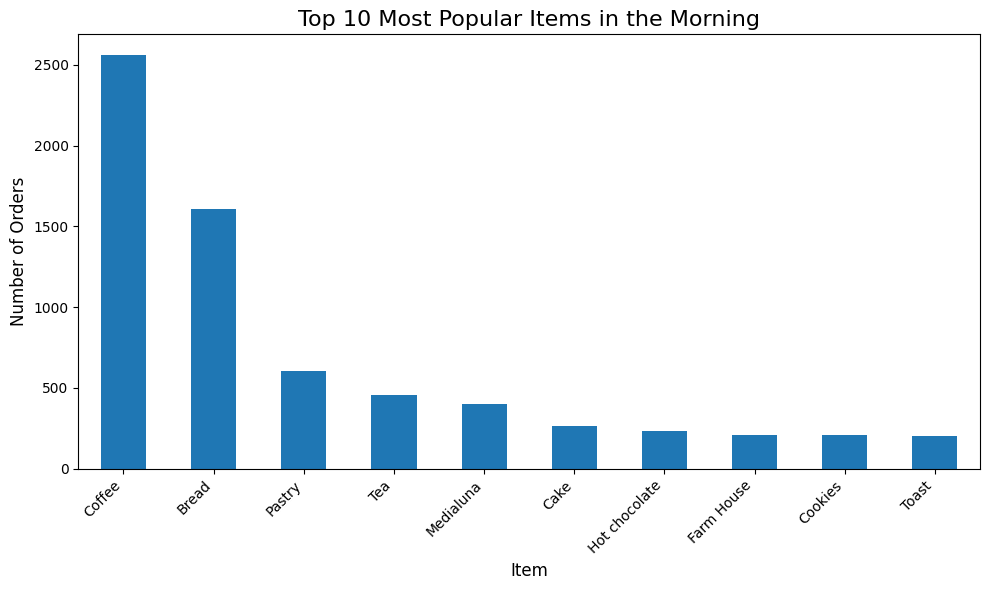

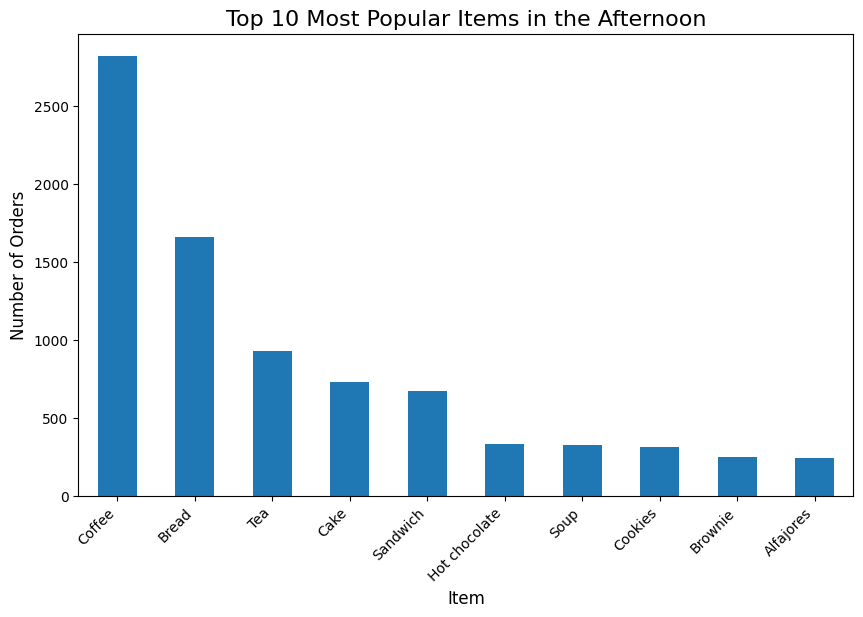

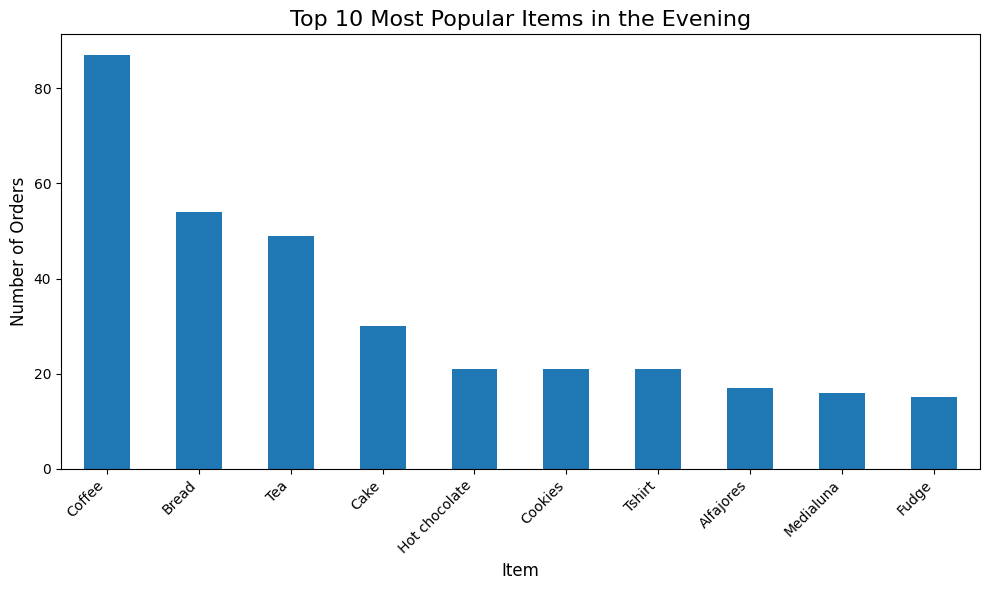

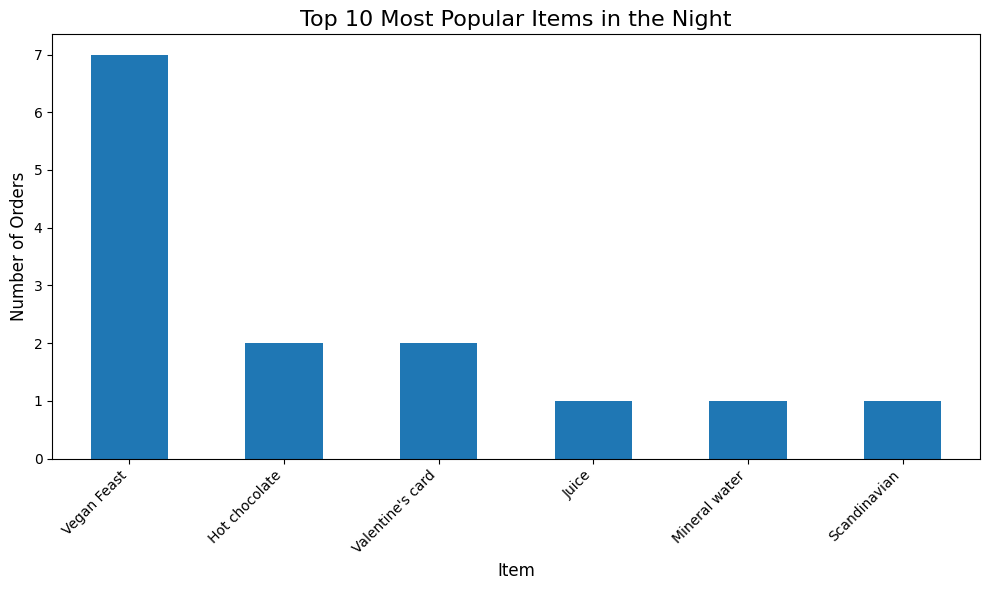

In [37]:
# 20
# Morning
morning_sales = data[data['period_day'] == 'morning']
morning_item_counts = morning_sales['Item'].value_counts()
top_10_morning_items = morning_item_counts.head(10)
plt.figure(figsize=(10, 6))
top_10_morning_items.plot(kind='bar')

plt.title('Top 10 Most Popular Items in the Morning', fontsize=16)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Afternon
afternoon_sales = data[data['period_day'] == 'afternoon']
afternoon_item_counts = afternoon_sales['Item'].value_counts()
top_10_afternoon_items = afternoon_item_counts.head(10)
plt.figure(figsize=(10, 6))
top_10_afternoon_items.plot(kind='bar')

plt.title('Top 10 Most Popular Items in the Afternoon', fontsize=16)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

plt.xticks(rotation=45, ha='right')

# Evening
evening_sales = data[data['period_day'] == 'evening']
evening_item_counts = evening_sales['Item'].value_counts()
top_10_evening_items = evening_item_counts.head(10)
plt.figure(figsize=(10, 6))
top_10_evening_items.plot(kind='bar')

plt.title('Top 10 Most Popular Items in the Evening', fontsize=16)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Night
night_sales = data[data['period_day'] == 'night']
night_item_counts = night_sales['Item'].value_counts()
top_10_night_items = night_item_counts.head(10)
plt.figure(figsize=(10, 6))
top_10_night_items.plot(kind='bar')

plt.title('Top 10 Most Popular Items in the Night', fontsize=16)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


21. It turns out that there is something different in the plot above, the insight is ____


Coffee is the most amount number of order during morning, afternoon, and evening but at night people buy vegan feast. Morning and Evening have the most total of order but during night only 6 types of order.

I found a valentine card, I was curious about when people bought it so I made a visualization of it

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-43-9fab08c30a42>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valentine_sales['date'] = pd.to_datetime(valentine_sales['date_time']).dt.date


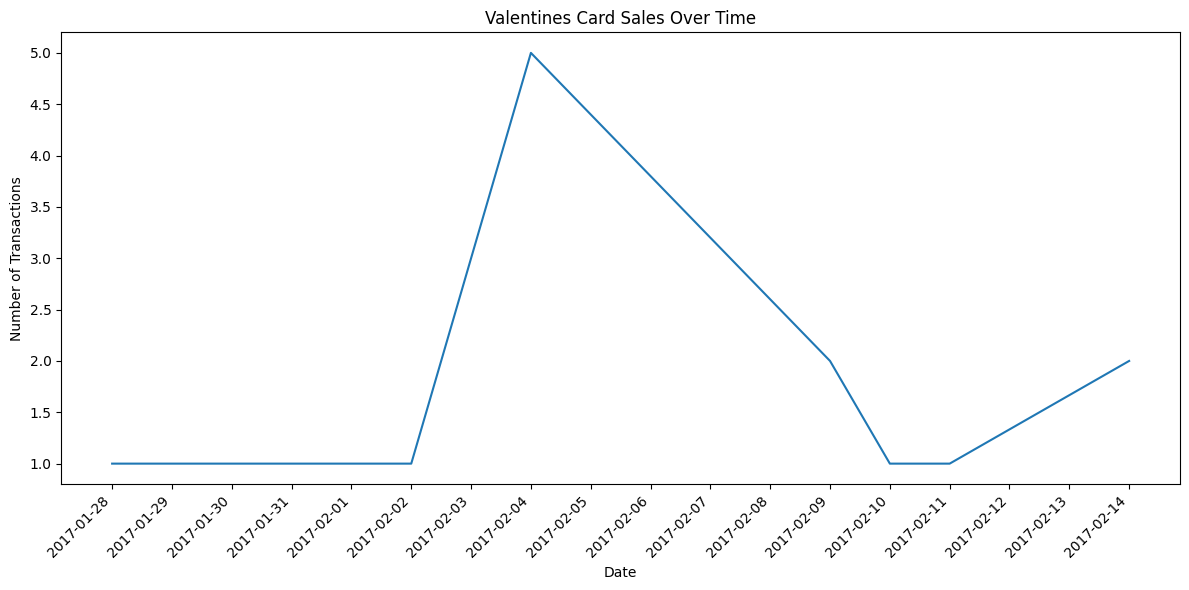

<Figure size 640x480 with 0 Axes>

In [43]:
#22
valentine_sales = data[data['Item'].str.contains('Valentine', case=False, na=False)]

valentine_sales['date'] = pd.to_datetime(valentine_sales['date_time']).dt.date
sales_by_date = valentine_sales.groupby('date').size()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values, linestyle='-', label='Valentine Card Sales')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1)) # Adjust interval as needed
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Valentines Card Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# Show the plot
plt.tight_layout()
plt.show()

23. I found the insight from the sale of the Valentine's cards above is ____


Valentine's card sales peak sharply in early February, possibly as people prepare in advance for the holiday, but decline quickly after the peak date, indicating concentrated demand around a specific timeframe before Valentine's Day.

## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [46]:
# 24
apriori_data = pd.crosstab(data['Transaction'], data['Item'])
apriori_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#25

# Convert quantities to 1 and 0
basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)
basket_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-47-024034fe465c>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [52]:
# 26
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)

# Create a DataFrame with 'support' and 'itemsets' columns
frequent_itemsets_df = frequent_itemsets[['support', 'itemsets']]

# Display the DataFrame
display(frequent_itemsets_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [55]:
# 27
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sample(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
13,(Coffee),(Medialuna),0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667,0.305936
2,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
6,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841,0.148110
5,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
12,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
11,(Coffee),(Juice),0.478394,0.038563,0.020602,0.043065,1.116750,0.002154,1.004705,0.200428
0,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
3,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
4,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
9,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



The most commonly purchased items include Coffee, Bread, and Cake, with Coffee showing a high level of association with other products, indicating it is frequently purchased alongside other items. Strong associations are observed between Coffee and products like Pastry, Cake, and Sandwich, suggesting that these items are commonly bought together. In contrast, some item combinations, such as Cake and Tea or Juice and Coffee, while still present, occur less frequently, indicating they are not as strongly favored by customers. Items like Alfajores, Brownie, and Truffles have relatively low support, pointing to less frequent purchases and potentially representing niche preferences. The high confidence values for pairs like Coffee and Pastry suggest opportunities for cross-selling and promotional bundling. Items that exhibit higher lift values, such as Coffee and Sandwich, indicate a strong, positive relationship beyond what would be expected from their individual popularity, and leverage metrics help identify item pairs that are more likely to occur together than by chance. These findings provide valuable insights into customer purchasing behavior and can inform strategies for targeted marketing, product placements, and promotions.